In [13]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt

#### Нейройсеть
<img src="./xor_problem.png" />
1 скрытый слой с 2 нейронами

$w_{12}$ - вес 1 нейрона у 2 нейрона следующего слоя

$x_{1}$ - значение нейрона

$n_{1}$ - вход 1 нейрона в слое ($\sum_{i} w_{ji}x_{i} $)

Матрица весов первого слоя `weight_1`: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix}$

Базис второго слоя `bias_1`: $ \begin{pmatrix} b_{1} & b_{2}\end{pmatrix} $

Вычисление входа второго слоя: $ \begin{pmatrix} x_{1} & x_{2} \end{pmatrix} \begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \begin{pmatrix} b_{1} & b_{2}\end{pmatrix} = \begin{pmatrix} n_{1} & n_{2} \end{pmatrix} $

Значения второго слоя: $ \begin{pmatrix} f(n_{1}) & f(n_{2}) \end{pmatrix} = \begin{pmatrix} x_{12} & x_{22} \end{pmatrix} $

Матрица весов второго слоя `weight_2`: $\begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix}$

Базис третьего слоя `bias_2`: $ \begin{pmatrix} b_{3}\end{pmatrix} $

Вычисление входа третьего слоя: $ \begin{pmatrix} x_{12} & x_{22} \end{pmatrix} \begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix} + \begin{pmatrix} b_{3}\end{pmatrix} = \begin{pmatrix} n_{13}\end{pmatrix} $

Значение 3 слоя: $f(n_{13}) = x_{13}$

Ошибка сети: $ (y_{target} - x_{13}) * f'(n_{13}) = \delta_{13}$

ошибки 2 слоя: $ \delta_1^3 \circ \begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix}^T \circ \begin{pmatrix} f'(n_{1}) &  f'(n_{2}) \end{pmatrix}) = \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} $

Общая формула обратного распространения ошибки: $ \begin{pmatrix} \delta_1 & ... & \delta_n \end{pmatrix} W^T \circ \begin{pmatrix} f'(n_{1}) & ... & f'(n_{n}) \end{pmatrix} $

Изменение весов 2 слоя:  $ \ \begin{pmatrix} x_{12} & x_{22} \end{pmatrix}^T \begin{pmatrix} \delta_1^3 \end{pmatrix} = \begin{pmatrix} \Delta_{11} \\ \Delta_{12} \end{pmatrix} $

Извенения базиса 2 слоя: $ \delta_1^3  = \Delta_b $

Изменение весов 1 слоя:  $ \begin{pmatrix} x_{11} & x_{12} \end{pmatrix}^T \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} =
\begin{pmatrix} x_{11} \\ x_{12} \end{pmatrix} \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} = \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix}$

Извенения базисов 1 слоя: $ \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix}  = \begin{pmatrix} \Delta_{b1} & \Delta_{b2} \end{pmatrix} $

Итоговое значение весов первого слоя: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \alpha * \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix} $, где $\alpha$ - скорость градиентного спуска

class Layer:
    def __init__(self, layer_size, prew_layer_size):
        self.layer_size = layer_size
        self.next_layer_size = next_layer_size
        weight = []
        for i in layer_size:
            line = []
            for j in next_layer_size:
                line.append(random.rand_range(-1, 1))
            weight.append(line)
        self.weight = weight
        
    def forward(prev_layer):
        neuron

In [68]:
# Функция, которую будем предсказывать:
def xor(x, y):
    return 1 if x+y != 1 else 0

# массив из данных, на которых будем обучать нейросеть
inputs = []
expected_output = []
for _ in range(256):
    x = randint(0, 1)
    y = randint(0, 1)
    inputs.append([x , y])
    expected_output.append(xor(x, y))
#     print ([x , y], '~>', xor(x, y))

inputs = np.array(inputs)
expected_output = np.array(expected_output)

# функция активации
def sigmoid(x):
    return 1.0/ (1 + np.exp(-x))

# производная от функции активации
def derivative_sigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

In [72]:
# Зададим размеры нейросети
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

# Инициализируем веса
Weight_1 = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
Bias_1 = np.random.uniform(size=(1, hiddenLayerNeurons))
Weight_2 = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
Bias_2 = np.random.uniform(size=(1, outputLayerNeurons))

In [62]:
# код нейросети

def forward(layer_in):
    # Слой 1
    layer_hidden = layer_in.dot(Weight_1) + Bias_1
    layer_hidden_result = sigmoid(layer_hidden)

    # Слой 2
    layer_out = layer_hidden_result.dot(Weight_2) + Bias_2
    layer_out_result = sigmoid(layer_out)
    return layer_out_result

In [71]:
# Проверим, что отвечает нейросеть на первые 10 пар чисел в данных

for x_i, y_i in zip(inputs[:10], expected_output[:10]):
    print(x_i, '~~>', '%.2f' % forward(x_i), '[%d]' % y_i)

[0 1] ~~> 0.80 [0]
[1 1] ~~> 0.81 [1]
[0 1] ~~> 0.80 [0]
[1 1] ~~> 0.81 [1]
[1 1] ~~> 0.81 [1]
[0 0] ~~> 0.76 [1]
[0 1] ~~> 0.80 [0]
[1 0] ~~> 0.78 [0]
[0 1] ~~> 0.80 [0]
[0 1] ~~> 0.80 [0]


In [20]:
def backward(layer_in, target):
    #layer 1
    layer_hidden = layer_in.dot(Weight_1) + Bias_1
    layer_hidden_result = sigmoid(layer_hidden)

    # Слой 2
    layer_out = layer_hidden_result.dot(Weight_2) + Bias_2
    layer_out_result = sigmoid(layer_out)
    
    loss = target - layer_out_result
    errors_2 = loss * derivative_sigmoid(layer_2)
    errors_1 = np.transpose(W2).dot(errors_2) * derivative_sigmoid(layer_1)
    d1w_in = errors_1.dot(x0.T)
    d1b_in = np.ones((2,1)) * np.sum(errors_1,axis=0,keepdims=True)
    d2w_in = errors_2 * layer_1_result.T
    d2b_in = np.ones((1,1)) * np.sum(errors_2,axis=0,keepdims=True)
    return d1w_in, d1b_in, d2w_in, d2b_in

res = backward(np.reshape(x_train[0], (2,1)), y_train[0])
    

In [21]:
loss_history = []
hist_W1 = []
hist_B1 = []
hist_W2 = []
hist_B2 = []

In [22]:
W1 = np.random.uniform(low=0, high=1, size=(2,2))
B1 = np.random.uniform(low=0, high=1, size=(2,1))
W2 = np.random.uniform(low=0, high=1, size=(1,2))
B2 = np.random.uniform(low=0, high=1, size=(1,1))
print(W1)
print(B1)
print(W2)
print(B2)

[[0.57684054 0.80290286]
 [0.68989602 0.63066055]]
[[0.07782376]
 [0.49501388]]
[[0.32524563 0.83273591]]
[[0.81657779]]


In [29]:
epochs = 10000
lr = 0.1
inputs = np.array([[[0],[0]],[[0],[1]],[[1],[0]],[[1],[1]]])
expected_output = np.array([[0],[1],[1],[0]])



for e in range(epochs):
    hist_W1.append(W1.flatten())
    hist_B1.append(B1.flatten())
    hist_W2.append(W2.flatten())
    hist_B2.append(B2.flatten())
    i=0
    batch_loss = []
    while(i<inputs.shape[0]):
        x_batch = np.reshape(inputs[i], (2,1))
        y_batch = expected_output[i]
        i += 1
        d1w, d1b, d2w, d2b = backward(x_batch, y_batch)
        W1 += lr * d1w
        B1 += lr * d1b
        W2 += lr * d2w
        B2 += lr * d2b
        a2 = forward(x_batch)
        loss = np.linalg.norm(a2 - y_batch)
        batch_loss.append(np.linalg.norm(a2 - y_batch))
        hist_W1.append(W1.flatten())
    loss_history.append(np.mean(batch_loss))
   
    hist_B1.append(B1.flatten())
    hist_W2.append(W2.flatten())
    hist_B2.append(B2.flatten())


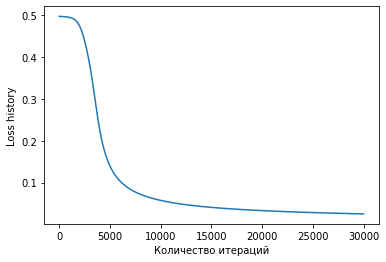

In [30]:
# plt.plot(hist_W1)
plt.plot(loss_history)
plt.ylabel('Loss history')
plt.xlabel('Количество итераций')
plt.show()

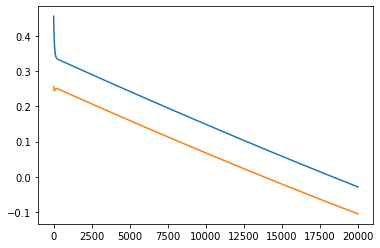

In [130]:
plt.plot(hist_B1)


plt.show()

In [8]:
inputs

array([[[0],
        [0]],

       [[0],
        [1]],

       [[1],
        [0]],

       [[1],
        [1]]])

In [9]:
inputs


array([[[0],
        [0]],

       [[0],
        [1]],

       [[1],
        [0]],

       [[1],
        [1]]])

In [52]:
W1

array([[0.71251669, 0.17986224],
       [0.976786  , 0.70148031]])

In [65]:
def simple_looped_nn_calc(n_layers, x, w, b):
  for l in range(n_layers - 1): #Формируется входной массив - перемножения весов в каждом слое# Если первый слой, то входной массив равен вектору х# Если слой не первый, вход для текущего слоя равен# выходу предыдущего
    if l == 0:
      node_in = x
    else :
      node_in = h #формирует выходной массив для узлов в слое l + 1
    h = np.zeros((w[l].shape[0], ))#проходит по строкам массива весов
    for i in range(w[l].shape[0]): #считает сумму внутри активационной функции
        f_sum = 0 #проходит по столбцам массива весов
        for j in range(w[l].shape[1]):
          f_sum += w[l][i][j] * node_in[j] #добавляет смещение
        f_sum += b[l][i]

    #использует активационную функцию для расчета
    #i - того выхода, в данном случае h1, h2, h3
    h[i] = f(f_sum)
return h


SyntaxError: 'return' outside function (<ipython-input-65-8273894b40e4>, line 17)

In [75]:
a = np.array([[0.03732454], [0.02102299]])

In [81]:
print(a)#.dot(np.ones(1,2)))
print(np.ones((1,2)))
print(a.dot(np.ones((2,1))))

[[0.03732454]
 [0.02102299]]
[[1. 1.]]


ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [78]:
import numpy as np 
#np.random.seed(0)

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 10000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))
W1 = hidden_weights.T
B1 = hidden_bias.T
W2 = output_weights.T
B2 = output_bias.T
x0 = inputs.T
print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)


#Training algorithm
for _ in range(epochs):
    #Forward Propagation
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    hidden_layer_activation += hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    output_layer_activation += output_bias
    predicted_output = sigmoid(output_layer_activation)
    

#Backpropagation
    error = expected_output - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
#     output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    output_bias += d_predicted_output
#     hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    hidden_bias += d_hidden_layer
    

print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)

Initial hidden weights: [0.04861323 0.79488986] [0.82501916 0.83560787]
Initial hidden biases: [0.81745818 0.75581678]
Initial output weights: [0.07459985] [0.0595384]
Initial output biases: [0.50998396]


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (4,1)

In [73]:
np.ones((2,1)) * np.sum(errors_1,axis=0,keepdims=True)

array([[-0.01020912],
       [-0.01020912]])

In [76]:
hidden_layer_activation = np.dot(inputs,hidden_weights)
hidden_layer_activation += hidden_bias
hidden_layer_output = sigmoid(hidden_layer_activation)

output_layer_activation = np.dot(hidden_layer_output,output_weights)
output_layer_activation += output_bias
predicted_output = sigmoid(output_layer_activation)

In [77]:
print(inputs)

[[1 1]]


In [79]:
hidden_layer_output.T.dot(d_predicted_output)

array([[-0.1044184 ],
       [-0.10387517]])

In [80]:
hidden_layer_output

array([[0.69369652, 0.68044482],
       [0.83787175, 0.83081645],
       [0.70392758, 0.82501577],
       [0.84436753, 0.91577775]])

In [81]:
d_predicted_output

array([[-0.14773665],
       [ 0.07940455],
       [ 0.08018692],
       [-0.14793394]])